In this notebook, we have covered algorithm for multiple variable using the linear regression method.
The following notebook contains the following:
* Importing Libraries
* Creating a function y = f(x), where x is independent variable and y is dependent variable. 
* A hypothesis function: h(theta,x)
* A cost function
* A gradient descent function
* Creating a function for linear regression 

### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Creating a function: y = f(x)

In [3]:
x = np.random.rand(100,3)
x = np.c_[np.ones(x.shape[0]),x]
y = 4*x[:,0] + 3 * x[:,1] + 5 *x[:,2] + 6*x[:,3]

In [4]:
y = y.reshape((100,1))

In [5]:
x[:5,:]

array([[1.        , 0.76561806, 0.87443438, 0.97038149],
       [1.        , 0.65528989, 0.08386985, 0.96532448],
       [1.        , 0.66801751, 0.41479689, 0.69484028],
       [1.        , 0.18554315, 0.21448508, 0.25224428],
       [1.        , 0.02024445, 0.80911238, 0.45513144]])

In [7]:
y[:5]

array([[16.49131502],
       [12.17716581],
       [12.24707863],
       [ 7.14252055],
       [10.83708386]])

### Defining function: 
1. Hypothesis
2. mse_cost
3. gradient_descent

In [8]:
def hypothesis(theta,X):
    return np.dot(X, theta)

In [13]:
def mse_cost(theta,X,y):
    m = X.shape[0]
    return float(np.dot((hypothesis(theta,X) - y).T ,(hypothesis(theta,X) - y)) / (2* m))

In [14]:
def gradient_descent(X, y, learning_rate, n_iteration):
    m = X.shape[0]
    print("Total number of Training set: ",m)
    
    theta = np.random.rand(4,1)
    print("Initial theta value:\n",theta)
    
    cost_function = []
    
    for i in range(n_iteration):
        cost_function.append(mse_cost(theta,X,y))
        gradient = 2 * np.dot(X.T,hypothesis(theta,X)-y)/m
        temp = theta - learning_rate * gradient
        theta = temp
     
    print("Final Theta value:\n", theta)
    
    return theta,cost_function

In [15]:
def linear_reg(X,y,alpha,cycles):
    '''This is a simple model used to demonstrate the Linear Regression model 
    
    Parameters:
    
    X : Input values in array 
    y : Target/dependent value in array
    
    return:
    
    theta : array
    cost_function : This is a mean square error. 
    
    '''
    
    theta, cost_function = gradient_descent(X,y,alpha,cycles)    
    
    return theta, cost_function

In [16]:
t , c = linear_reg(X=x, y=y,alpha =  0.1, cycles = 1000)

Total number of Training set:  100
Initial theta value:
 [[0.67217201]
 [0.73611024]
 [0.04381132]
 [0.72608797]]
Final Theta value:
 [[4.00005991]
 [2.99996043]
 [4.99996021]
 [5.99996105]]


In [17]:
def lr_predict(X, theta):
    y_pred = np.dot(X,theta)
    return y_pred

In [18]:
test_x = np.random.rand(1,3)
test_x = np.c_[np.ones(test_x.shape[0]), test_x]

In [19]:
predict_y = lr_predict(test_x,t)
print("The predicted value of y:", predict_y)

array([[6.21928009]])

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x,y)
sk_y = model.predict(test_x)
print("The predicted value of y:", sk_y)

array([[6.21924445]])

In [21]:
model.coef_

array([[0., 3., 5., 6.]])

In [22]:
model.intercept_

array([4.])

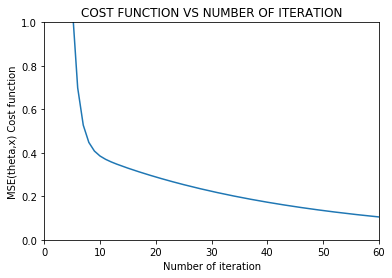

In [23]:
plt.figure()
plt.style.use('_classic_test_patch')
plt.plot(range(len(c)),c)
plt.xlabel('Number of iteration')
plt.ylabel('MSE(theta,x) Cost function')
plt.title('COST FUNCTION VS NUMBER OF ITERATION')
plt.axis([0,60,0,1])
plt.show()